#  Distance and Similarity Measures in Python

This notebook is an optional resource that goes with the tutorial video. This may help you learn it faster by following along, and filling in the code.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
cmap = sns.diverging_palette(220, 10, as_cmap=True)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Update the path to the NHANES dataset

In [5]:
nhanes = pd.read_csv('nhanes.csv')
nhanes = nhanes.drop_duplicates('ID') # remove multiple entries from the same person
cols = ['Weight', 'Height', 'Gender', 'Age', 'BPSysAve', 'BPDiaAve',
        'TotChol', 'Diabetes', 'PhysActive', 'SmokeNow']
df = nhanes[cols].copy()
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)
y = df.Diabetes_Yes.values
X = df.drop('Diabetes_Yes', axis=1).values

np.random.seed(5)
scaler = StandardScaler()
X = scaler.fit_transform(X) # fit method calculates mean and sd for each column
np.random.seed(5)
idx = np.random.randint(X.shape[0], size=10)
small_X = X[idx, :]

## Distance and Similarity Measures

In [9]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels

Calculate the L1 pairwise distances between these 10 observations in small_X.

In [11]:
d=pairwise_distances(small_X, metric='l1')
d

array([[ 0.        ,  2.3394668 , 13.41685309,  3.58939126,  9.08588508,
         9.37392212,  5.67578751,  9.60009329, 11.60714572,  4.59821791],
       [ 2.3394668 ,  0.        , 11.65618791,  4.62384847, 10.61195682,
         9.53526104,  5.58609059, 11.12616504, 12.21474602,  4.03492833],
       [13.41685309, 11.65618791,  0.        , 14.66220518, 14.58684612,
         6.48964998, 11.76708207, 14.28765928, 14.42745528, 11.31741184],
       [ 3.58939126,  4.62384847, 14.66220518,  0.        ,  5.98810835,
        10.68032929,  6.34777881,  7.13673244,  9.52802336,  5.05055016],
       [ 9.08588508, 10.61195682, 14.58684612,  5.98810835,  0.        ,
         9.87814701,  9.42224132,  3.71201828,  8.17739095,  8.78918666],
       [ 9.37392212,  9.53526104,  6.48964998, 10.68032929,  9.87814701,
         0.        ,  8.21253272,  8.15117639,  8.48145979,  9.46689324],
       [ 5.67578751,  5.58609059, 11.76708207,  6.34777881,  9.42224132,
         8.21253272,  0.        ,  9.43596035

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Now we want to be able to pass in gamma as a parameter, instead of hard-coding it. 

Modify the `rbf` function to use a parameter `gamma` and return a *function* called `kernel` that calculates the kernel as we did before. Pass this function into the classifier with gamma as a parameter. Try several values of gamma to get a higher test accuracy.  

# Live

In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.datasets import make_classification, make_moons
data = make_moons(n_samples=1000, shuffle=True, noise=.25, random_state=1)
X = data[0]
y = data[1]

In [12]:
data

(array([[ 0.32839742,  0.16719817],
        [ 1.37360837, -0.78605357],
        [-0.70373788, -0.07753836],
        ...,
        [ 1.80252754,  0.21083951],
        [ 0.22597548,  0.69471671],
        [ 1.32594372,  0.48184186]]),
 array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 

In [13]:
####Shouldn't do the EDA on Whole, but should do the training
#plt.scatter(X[y==0, 0], X[y==0, 1], label=0)
#plt.scatter(X[y==1, 0], X[y==1, 1], label=1)
#plt.legend()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)

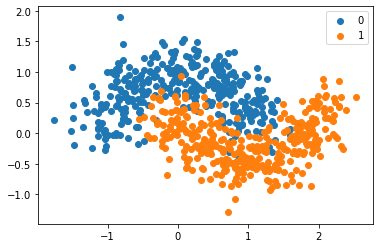

In [15]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label=0)
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label=1)
plt.legend()

# Logistic

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds_lr = lr.predict(X_test)
probs_lr = lr.predict_proba(X_test)[:, 1]
print('Recall: {:.3f}'.format(recall_score(y_test, preds_lr)))
print('Precision: {:.3f}'.format(precision_score(y_test, preds_lr)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, probs_lr)))

Recall: 0.853
Precision: 0.865
ROC AUC: 0.936


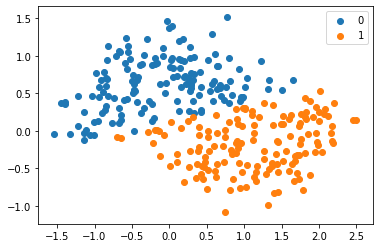

In [17]:
plt.scatter(X_test[preds_lr==0, 0], X_test[preds_lr==0, 1], label=0)
plt.scatter(X_test[preds_lr==1, 0], X_test[preds_lr==1, 1], label=1)
plt.legend()

In [18]:
lr.coef_
#x1 increase by 1, log increase by 1.11, x2, increase by 1, log increase by -3.967

array([[ 1.11463945, -3.96708484]])

# KNN

In [19]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)
probs_knn = knn.predict_proba(X_test)[:, 1]
print('Recall: {:.3f}'.format(recall_score(y_test, preds_knn)))
print('Precision: {:.3f}'.format(precision_score(y_test, preds_knn)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y_test, probs_knn)))


Recall: 0.913
Precision: 0.932
ROC AUC: 0.948


In [20]:
probs_knn

array([1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.66666667,
       0.33333333, 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.33333333, 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.33333333, 0.        , 1.        ,
       0.        , 0.33333333, 0.        , 1.        , 0.        ,
       1.        , 0.66666667, 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.66666667, 1.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 0.        , 0.66666667, 0.        , 0.     

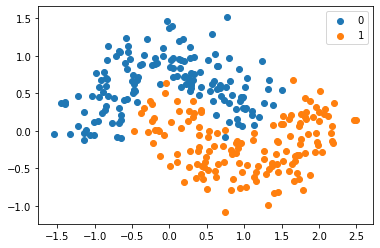

In [16]:
plt.scatter(X_test[preds_knn==0, 0], X_test[preds_knn==0, 1], label=0)
plt.scatter(X_test[preds_knn==1, 0], X_test[preds_knn==1, 1], label=1)
plt.legend()

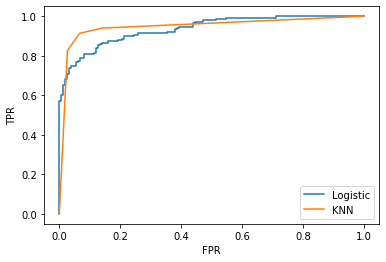

In [11]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)
plt.plot(fpr_lr, tpr_lr, label='Logistic')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [20]:
data2=np.random.randn(1000, 8)
data2[0:3, :]

array([[ 0.78741177,  1.14836307, -0.17141499,  0.09470193,  1.827925  ,
         1.35573407, -0.53777225, -0.53453874],
       [-0.39973866, -0.30085863,  0.14874563,  0.96006452, -1.09281071,
        -1.80323427,  0.49071085,  0.37231198],
       [ 1.19941421, -2.07422386,  0.93018016,  1.22153715, -0.1054034 ,
         0.49085674, -1.344966  ,  0.09308285]])

In [23]:
new_data=np.hstack((X, data2))

In [24]:
X2=data[0]
y2=data[1]

In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(new_data, y2, test_size=.3, stratify=y, random_state=1)

In [26]:
lr = LogisticRegression()
lr.fit(X2_train, y2_train)
preds_lr = lr.predict(X2_test)
probs_lr = lr.predict_proba(X2_test)[:, 1]
print('Recall: {:.3f}'.format(recall_score(y2_test, preds_lr)))
print('Precision: {:.3f}'.format(precision_score(y2_test, preds_lr)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y2_test, probs_lr)))

Recall: 0.833
Precision: 0.868
ROC AUC: 0.937


In [28]:
knn = KNeighborsClassifier(3)
knn.fit(X2_train, y2_train)
preds_knn = knn.predict(X2_test)
probs_knn = knn.predict_proba(X2_test)[:, 1]
print('Recall: {:.3f}'.format(recall_score(y2_test, preds_knn)))
print('Precision: {:.3f}'.format(precision_score(y2_test, preds_knn)))
print('ROC AUC: {:.3f}'.format(roc_auc_score(y2_test, probs_knn)))


Recall: 0.807
Precision: 0.761
ROC AUC: 0.832


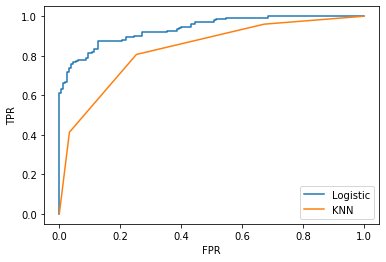

In [29]:
fpr_lr, tpr_lr, _ = roc_curve(y2_test, probs_lr)
fpr_knn, tpr_knn, _ = roc_curve(y2_test, probs_knn)
plt.plot(fpr_lr, tpr_lr, label='Logistic')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()